In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import json

%matplotlib inline

# 데이터 로드

In [412]:
path = './data/'

In [413]:
vcolumns = ['video_id', 'title', 'channel_title', 'category_id',
          'tags', 'views', 'likes', 'dislikes', 'comment_total',
          'thumbnail_link', 'date']
# video_id = 영상 아이디
# title = 영상의 제목
# channal_title = 채널의 이름
# category_id = ?
# tags = 영상의 분류 '|'로 스플릿
# views = 조회수
# likes = 좋아요 수
# delikes = 싫어요 수
# comment_total = 댓글 달린 수
# thumbnail_link = 썸네일 링크
# date = 업로드 일자

ccolumns = ['video_id', 'comment_text', 'likes', 'replies']
# video_id = 영상 아이디
# comment_text = 댓글
# likes = 댓글의 좋아요 수
# replies = 대댓글 달린 개수

videos =  pd.read_csv(path+"/USvideos.csv", usecols=vcolumns)
comments = pd.read_csv(path+"/UScomments.csv", usecols=ccolumns)

In [414]:
with open(path+'US_category_id.json') as json_file:
    json_data = json.load(json_file)
    
    
categories = {}

for category in json_data['items']:
    categories[category['id']] = category['snippet']['title']
categories

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

# 영상 데이터 확인

In [415]:
vdf = pd.DataFrame(videos)

In [416]:
vdf.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [417]:
vdf.describe()

,category_id,views,likes,dislikes,comment_total
count,7998.000000,7.998000e+03,7.998000e+03,7998.000000,7998.000000
mean,20.217679,9.391016e+05,3.450900e+04,1780.842711,4608.306952
std,7.415364,2.147691e+06,9.135465e+04,10818.085920,20245.638964
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,17.000000,9.690000e+04,1.901500e+03,68.000000,286.250000
50%,23.000000,3.086115e+05,8.649500e+03,273.000000,1086.500000
75%,25.000000,9.595132e+05,3.022050e+04,1013.000000,3464.250000
max,43.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000


In [418]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        7998 non-null   object
 1   title           7998 non-null   object
 2   channel_title   7998 non-null   object
 3   category_id     7998 non-null   int64 
 4   tags            7998 non-null   object
 5   views           7998 non-null   int64 
 6   likes           7998 non-null   int64 
 7   dislikes        7998 non-null   int64 
 8   comment_total   7998 non-null   int64 
 9   thumbnail_link  7998 non-null   object
 10  date            7998 non-null   object
dtypes: int64(5), object(6)
memory usage: 687.5+ KB


## -카테고리에 따른 시청자, 좋아요, 싫어요, 댓글 수
#### 웬지; 의미없어보임

In [419]:
video_cat = vdf.groupby('category_id').sum()
video_cat

,views,likes,dislikes,comment_total
category_id,,,,
1,392920664,8721068,434484,1343191
2,70492489,1574626,53518,176931
10,1475992648,76110117,2763057,8689059
15,75562909,1883089,33880,264909
17,298658073,6549136,203483,829171
19,22273972,587195,14418,73559
20,55848709,1671279,78739,382762
22,856891892,34603439,3243878,5094321
23,936255337,43528592,1432895,4635270


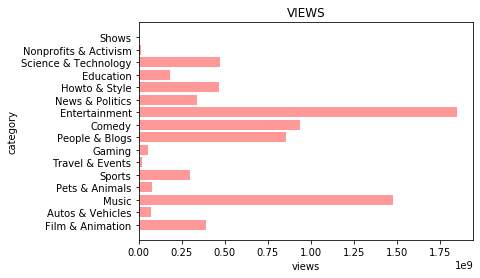

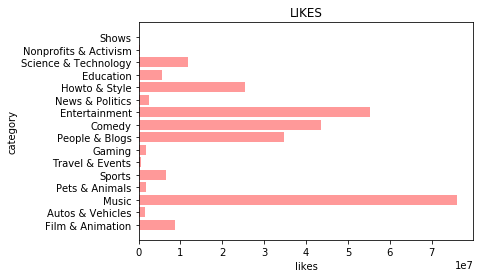

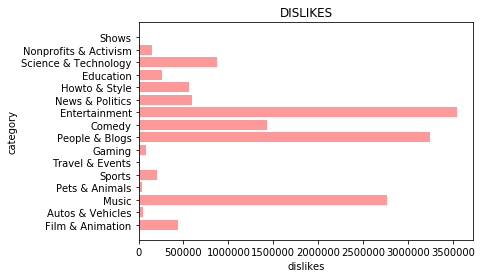

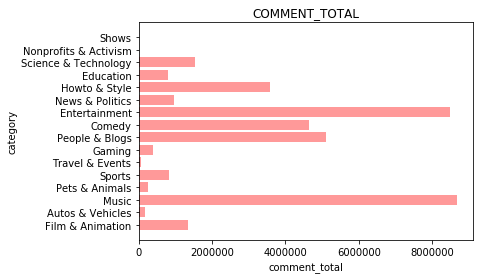

In [420]:
label = [categories.get(str(i)) for i in sorted(vdf.category_id.unique())]
index = np.arange(len(vdf.category_id.unique()))

for column in cat.columns:
    plt.barh(index, video_cat[column], color='r', alpha=0.4)
    plt.title(column.upper())
    plt.xlabel(column)
    plt.ylabel('category')
    plt.yticks(index, label)
    plt.show()

## -조회수와 좋아요의 관계

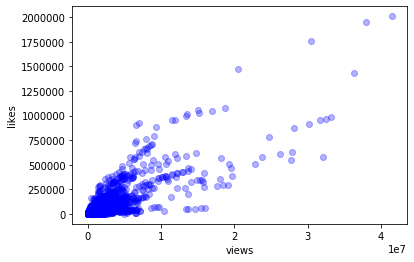

In [421]:
plt.scatter(vdf.views, vdf.likes, color='b', alpha=0.3)
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

## -조회수와 댓글수의 관계

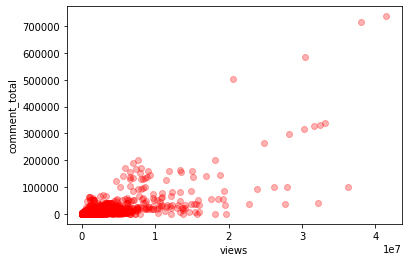

In [422]:
plt.scatter(vdf.views, vdf.comment_total, color='r', alpha=0.3)
plt.xlabel('views')
plt.ylabel('comment_total')
plt.show()

## -좋아요와 댓글수의 관계

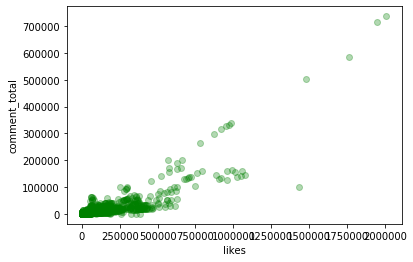

In [423]:
plt.scatter(vdf.likes, vdf.comment_total, color='g', alpha=0.3)
plt.xlabel('likes')
plt.ylabel('comment_total')
plt.show()

# 댓글 데이터 확인

In [424]:
cdf = pd.DataFrame(comments)

In [425]:
cdf

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691402,EoejGgUNmVU,Лучшая,1,0
691403,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691404,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691405,EoejGgUNmVU,Islığı yeter...,0,0


In [426]:
cdf.describe()

,video_id,comment_text,likes,replies
count,691407,691382,691407,691407
unique,2266,434082,1333,526
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,320892,401591


## -결측치 제거

In [427]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691407 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691407 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691407 non-null  object
 3   replies       691407 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [428]:
cdf.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [429]:
cdf[cdf.comment_text.isna()]

,video_id,comment_text,likes,replies
76136,7YAAyUFL1GQ,NaN,0,0
215223,KUCHBBCj77I,NaN,0,0
234231,KUCHBBCj77I,NaN,0,0
306025,s3Hk_lDw5yo,NaN,0,0
332817,zrOHeEA14kQ,NaN,0,0
357512,zmg9tVaMVd4,NaN,0,0
379588,zmg9tVaMVd4,NaN,0,0
403020,9eea7_7OBZQ,NaN,0,0
425245,6l5P7jHUcjI,NaN,0,0
436355,IQisUbBljW0,NaN,0,0


In [430]:
cdf.dropna(inplace=True)

In [431]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691382 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691382 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691382 non-null  object
 3   replies       691382 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


## - 이상치 제거

## -영상 카테고리 별 댓글 빈도

## -좋아요 수와 댓글빈도
#### 얘도 의미 없는듯

In [432]:
command_cat = cdf.groupby('video_id')

In [433]:
tlikes = list(cdf.likes)
for i in range(len(tlikes)):
    try:
        int(tlikes[i])
    except:
        print(tlikes[i])
        tlikes[i] = '0'
x = list(map(int, tlikes))

FoxSearchlight
likes
 forever my girl crush 😍"
 without a doubt
 and even better to see Brie out there supporting her sister
 but shes delicate right now... Girl me too Sunbeam. Me fucking too"


In [434]:
treplies = list(cdf.replies)
for i in range(len(treplies)):
    try:
        int(treplies[i])
    except:
        print(treplies[i])
        treplies[i] = '0'
y = list(map(int, treplies))

replies
0KFUIVfKTeVg
 the worst movie I've seen since Master of Disguise
 like always. It will always be the Bella Twins against the world. All my love for these two Queens."
103jeumSTSzc


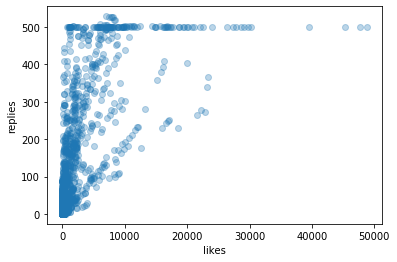

In [435]:
plt.scatter(x, y, alpha=0.3)
plt.xlabel('likes')
plt.ylabel('replies')
plt.show()